This notebook creates a plot that compares novel transcripts (that are RBH match*) in Diencephalon to the best overlap (based on genomic coordinates) in Telecephalon; and also visa versa comparing transcripts in Telecephalon to Diencephalon.  

For example if we have a "RBH match" Diencephalon transcript, and we find a "RBH match" Telecephalon transcript that covers ALL the same base pairs (and perhaps more) than the value is 1.  (the value is realy a ratio of how many Diencepalon transcript base pairs coordinates are covered by the best matching Telecephalon trancript, and best matching just means the highest ratio).  Also, if we have a "RBH match" transcript in one brain region and with no overlaping transcript in the other brain region the value (ratio) is 0.

* RBH match means a Reciprocal Best Hit Blast match.  The blast from the novel transcript finds as the best hit a zebrafish protein, and when the zebrafish protein is blasted to a database of stickleback novel and annotated transcript, the best hit is the original novel transcript.

Results: the plot below show that the majority of RBH match transcripts have a high overlap to a RBH match transcript in the other brain region



In [1]:
import os # operating system library
# display current working directory
os.getcwd() 

'/Users/josephtroy/jmtfolders/machine_learning_10_15_2017/intro-to-machine-learning-master'

In [2]:
import pandas as pd # import the pandas library and use a variable called pd 
import matplotlib.pyplot as plt
import matplotlib
# this wierd bit of code is need to display graphics
%matplotlib inline  
matplotlib.style.use('ggplot')

In [3]:
# TO DO set working directory to path where 'max_overlap_from_diff_and_same_brain_region.txt' is at
os.chdir('/Users/josephtroy/Box Sync/BoxSimons/RBH_results_intERgenic/RBH_compare_D_and_T/output_data/final_reports')
# set file to file name
file = 'max_overlap_from_diff_and_same_brain_region.txt'
# read file with pandas
report_df = pd.read_csv(file,sep='\t')
list(report_df.columns.values)

['t_id',
 'region',
 'chrom',
 'transcript_start',
 'transcript_end',
 'transcript_lenght',
 'exons',
 'base_pairs',
 'diff_region_intersecting_t_id',
 'diff_region_intersecting_exons',
 'diff_region_intersecting_bps',
 'diff_region_ratio',
 'region_transcript_start',
 'diff_region_transcript_end',
 'diff_region_trans_len',
 'diff_region_trans_overlap',
 'same_region_intersecting_t_id',
 'same_region_intersecting_exons',
 'same_region_intersecting_bps',
 'same_region_ratio',
 'same_region_transcript_start',
 'same_region_transcript_end',
 'same_region_trans_len',
 'same_region_trans_overlap']

In [4]:
# sort the data from by the value we wish to plot. sort desending.
report_df = report_df.sort_values(by=['diff_region_ratio'],ascending=[False])

In [5]:
ratios_to_plot = report_df['diff_region_ratio']
print ('min ratio = ' + str(min(ratios_to_plot))  +  ',   max ratio = ' + str(max(ratios_to_plot)))
type(ratios_to_plot)

min ratio = 0.0,   max ratio = 1.0


pandas.core.series.Series

In [6]:
len(ratios_to_plot)

1055

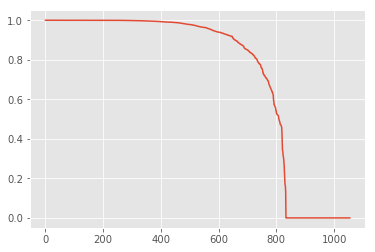

In [8]:
# for the plot I need a x axis, which is just 0 to the number of transcripts 
# the y axis is the ratio of similaity to the best matching transcript in the other tissue, with a maximum being 1
# 1 means the matching transcript in the other tissue covers all the base pairs, 0 means no matching transcript was
# found in the other tissue
x_axis = range(len(ratios_to_plot))
plt.plot(x_axis,ratios_to_plot)